In [1]:
from collections import Counter
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import random
# import torch

# 病历导入与数据内容检查

In [2]:
file = open("D:/github_planting/MGM/data/test.json", 'r', encoding='utf-8')
Medical_History = []
for line in file.readlines():
    dic = json.loads(line)
    Medical_History.append(dic)

In [3]:
Medical_History[5]

{'user_id': '435353',
 'lcd_id': 'BNP130',
 'lcd_name': '便血病',
 'syndrome': '气虚不摄证',
 'chief_complaint': '大便发黑间作4月余。',
 'description': '患者4月前无明显诱因解黑便，无呕血，无发热，纳可，无呕血，无明显呕吐，时有上腹疼痛，伴反酸烧心，无恶心，无明显后背反酸痛，无明显嗳气，夜寐安。近4月来患者反复解黑便，伴乏力，时有心慌，活动后心慌胸闷喘憋，患者昨日在我院查胃镜示：胃巨大溃疡伴出血（Ca？） 待病理，为求进一步诊治，收住我院。病程中，无发热，今日间断恶心、呕吐，呕吐进食食物及胃内容物，无黄疸，无吞咽困难，小便可，近期体重无明显下降。',
 'detection': '神志清晰，精神尚可，形体形体适中，语言清晰，口唇红润；皮肤正常，无斑疹。头颅大小形态正常，无目窼下陷，无白睛，耳轮正常，无耳瘘级生疮；颈部对称，无青筋暴露，无瘿瘤瘰疬，胸部对称，虚里搏动正常，腹部平坦，无癥瘕痞块，爪甲色泽：色泽红润，双下肢对称，舌淡红，苔白，脉细。',
 'norm_syndrome': '气虚不摄证'}

# 病历数量

In [4]:
len(Medical_History)

5486

## 标签数量和每种证型的个数

In [5]:
syndromes = [item['syndrome'] for item in Medical_History]
syndrome_counts = Counter(syndromes)

In [6]:
syndrome_counts

Counter({'气虚血瘀证': 923,
         '湿热下注证': 872,
         '气滞血瘀证': 525,
         '风痰阻络证': 373,
         '肝胃郁热证': 224,
         '痰湿蕴肺证': 208,
         '正虚瘀结证': 205,
         '热毒蕴结证': 144,
         '脾肾两虚证': 110,
         '肝肾亏虚证': 103,
         '气阴两虚证': 94,
         '湿热瘀阻证': 70,
         '肾虚证': 66,
         '肝胃不和证': 61,
         '肝肾不足证': 59,
         '风寒袭肺证': 59,
         '湿热蕴结证': 58,
         '脾胃虚寒证': 58,
         '阳虚水泛证': 56,
         '心血瘀阻证': 50,
         '风痰上扰证': 47,
         '风寒外袭证': 44,
         '风痰入络证': 37,
         '瘀血阻络证': 35,
         '痰瘀互结证': 35,
         '痰浊瘀阻证': 34,
         '阴虚阳亢证': 34,
         '痰浊蒙窍证': 32,
         '肝阳上亢证': 24,
         '气血亏虚证': 24,
         '痰湿蒙窍证': 24,
         '肝肾阴虚证': 22,
         '阴虚火旺证': 21,
         '痰湿中阻证': 21,
         '血瘀痰凝证': 20,
         '肝经湿热证': 19,
         '正虚瘀结': 17,
         '痰瘀痹阻证': 17,
         '血热证': 17,
         '正虚毒瘀证': 17,
         '脾胃不和证': 16,
         '阴虚血瘀证': 15,
         '湿热阻络证': 14,
         '湿热内蕴证': 13,
         '心血不足证': 13,
     

In [7]:
len(syndrome_counts)

190

## 数据整理成输入-输出的格式

In [12]:
MH = pd.DataFrame(Medical_History)
MH = MH[['lcd_name', 'description', 'chief_complaint', 'detection', 'syndrome']]

In [13]:
MH.head()

,lcd_name,description,chief_complaint,detection,syndrome
0,紫癜病,患者1年前无明显诱因出现皮肤青紫斑点，全身乏力，体检发现血小板减少，予徐州市二院就诊，诊断“...,反复皮肤青紫斑点1年，又作伴乏力3天,神志清晰，精神尚可，形体适中，语言清晰，口唇红润；皮肤正常，无斑疹。头颅大小形态正常，无目窼...,气虚不摄证
1,便血,"患者4天前出现大便色黑,1.22行血常规、电解质检查,结果无异常，自服抑酸、制酸剂，昨日大便...",大便色黑间作4天,神志清晰，精神尚可，形体适中，语言清晰，口唇红润；皮肤正常，无斑疹。头颅大小形态正常，无目窼...,气虚不摄证
2,吐血病,患者2年来间断出现呕血、黑便，多次于我市多家医院住院治疗，予抑酸、护胃、降低门静脉压力、止血...,反复呕血黑便2年，再发7小时。,神志清晰，精神尚可，形体偏瘦，语言清晰，口唇苍白；皮肤苍白，无斑疹。头颅大小形态正常，无目窼...,气虚不摄证
3,便血病,患者自2016年4月反复出现黑便，量多，诊断考虑：1.上消化道出血：食管静脉曲张破裂2.肝炎...,反复黑便间作三年余，再发半日,神志清晰，精神尚可，形体形体适中，语言清晰，口唇苍白；皮肤正常，无斑疹。头颅大小形态正常，无...,气虚不摄证
4,便血病,患者一年前无明显诱因出现大便不成形，次数增多，3-4次/日，便前伴腹痛，便后缓解，无明显粘液...,大便不成形一年，加重伴颜色发黑一周。,神志清晰，精神尚可，形体形体适中，语言清晰，口唇苍白；皮肤正常，无斑疹。头颅大小形态正常，无...,气虚不摄证


In [14]:
MH['lcd_name'] = MH['lcd_name'].str.strip()
MH['description'] = MH['description'].str.strip()
MH['chief_complaint'] = MH['chief_complaint'].str.strip()
MH['detection'] = MH['detection'].str.strip()

In [15]:
Train_data = pd.DataFrame(columns=['features', 'label'])

In [16]:
Train_data['features'] = MH['lcd_name'] + ' ' + MH['description'] + ' ' + MH['chief_complaint'] + ' ' + MH['detection']
Train_data['label'] = MH['syndrome']

In [17]:
Train_data

,features,label
0,紫癜病 患者1年前无明显诱因出现皮肤青紫斑点，全身乏力，体检发现血小板减少，予徐州市二院就诊...,气虚不摄证
1,"便血 患者4天前出现大便色黑,1.22行血常规、电解质检查,结果无异常，自服抑酸、制酸剂，昨...",气虚不摄证
2,吐血病 患者2年来间断出现呕血、黑便，多次于我市多家医院住院治疗，予抑酸、护胃、降低门静脉压...,气虚不摄证
3,便血病 患者自2016年4月反复出现黑便，量多，诊断考虑：1.上消化道出血：食管静脉曲张破裂...,气虚不摄证
4,便血病 患者一年前无明显诱因出现大便不成形，次数增多，3-4次/日，便前伴腹痛，便后缓解，无...,气虚不摄证
...,...,...
5481,蝼蛄疖病 患者1年前头顶部出现一小指甲大小肿物，时有刺痛、瘙痒不适，其后逐渐增多、增多，时常...,毒邪流窜证
5482,胸痹心痛病 患者10余年前开始反复出现胸闷心慌，头晕，乏力，持续数分钟，活动时明显，休息后可...,阳虚痰凝证
5483,胸痹心痛病 患者10余年前开始反复出现胸闷不适，受凉时明显，每次持续数分钟，休息后可缓解，未...,阳虚痰凝证
5484,便血病 患者昨日中午解黑便一次，无呕血，伴有上腹胀，四肢乏力，有反酸、嗳气及上腹部、胸骨后烧...,气虚血溢证


## 检查字数并可视化

In [18]:
features_length = Train_data['features'].apply(len).values
variance = np.var(features_length)

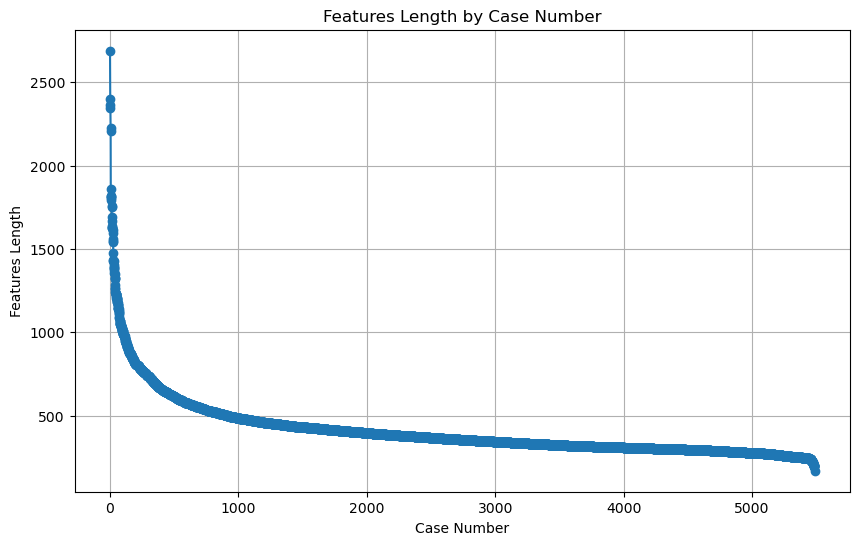

In [19]:
sorted_features_length = np.sort(features_length)[::-1]

case_numbers = range(1, len(features_length) + 1)

plt.figure(figsize=(10, 6))
plt.plot(case_numbers, sorted_features_length, marker='o')  # 使用线图，并为每个点添加标记
plt.title('Features Length by Case Number')
plt.xlabel('Case Number')
plt.ylabel('Features Length')
plt.grid(True)
plt.show()

# 模型的构建

In [20]:
random.seed(1234)
x_train,x_test,y_train,y_test = train_test_split(Train_data['features'], Train_data['label'], test_size=0.1, shuffle=True)
x_tr,x_val,y_tr,y_val = train_test_split(x_train, y_train, test_size=0.2, shuffle=True)

In [21]:
x_test

346     心衰病 患者5天前于受凉感冒好转后出现胸闷憋喘不适，活动后疲乏、心慌、心悸症状，夜间阵发性呼...
5198    头痛病 患者半月前无明显诱因出现头痛,枕部、颞部为甚,伴头晕不适，平卧后稍缓解，晨起时及活动...
151     心衰病 患者8天前开始无明显诱因下反复出现胸闷，活动后加重，伴心慌、乏力、头晕、头痛，未予重...
732     胸痹心痛病 患者1月前开始出现活动后胸闷，无胸痛放射痛，无心慌自汗，无喘憋气促，无咳嗽咯痰，...
2486    腰痛病 患者诉于一月前因不慎跌倒后腰部疼痛活动受限，伴有大腿酸痛、腹股沟疼痛。卧床后疼痛症情...
                              ...                        
1555    混合痔 患者半年前感会阴部坠胀明显，而致便后肛内肿物脱出，能回复，伴便血,自行治疗（具体不祥...
5151    眩晕病 患者8年前临产时出现妊娠期高血压，血压160/90mmHg，无头晕乏力，无视物旋转，...
1302    肛漏病 患者1月前无明显诱因下出现肛缘肿痛，且伴脓血外溢，未予治疗，遂来本院求治。刻下：肛旁...
750     心悸病 患者1周前无明显诱因出现头晕头昏，活动后憋喘，头部带帽感、沉重感，伴有右侧肢体麻木，...
2407    腰痛病 患者半月前因劳累后出现腰部及右下肢疼痛活动受限，疼痛进行性加重，劳累后加重，休息后可...
Name: features, Length: 549, dtype: object

## 标签和特征编码为数字格式

In [22]:
mlb = MultiLabelBinarizer()
yt = mlb.fit_transform(Train_data['label'])
print(yt[0])
print(mlb.inverse_transform(yt[0].reshape(1,-1)))
print(mlb.classes_)

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[('不', '摄', '气', '虚', '证')]
['上' '下' '不' '两' '中' '亏' '互' '亢' '交' '伤' '侵' '入' '内' '凝' '动' '卫' '和' '固'
 '壅' '外' '大' '失' '宫' '寒' '弱' '心' '怯' '扰' '振' '损' '摄' '旺' '机' '欲' '正' '毒'
 '气' '水' '泛' '注' '津' '流' '浊' '海' '清' '湿' '溢' '滞' '火' '炽' '热' '燥' '犯' '痰'
 '痹' '瘀' '盛' '督' '神' '积' '窍' '窜' '精' '纳' '经' '结' '络' '统' '耗' '肝' '肠' '肤'
 '肺' '肾' '胃' '胆' '胞' '脉' '脓' '脱' '脾' '蒙' '蕴' '虚' '血' '表' '袭' '证' '调' '足'
 '运' '邪' '郁' '闭' '阳' '阴' '阻' '陷' '风' '食' '饮' '髓']


In [ ]:
class QTagDataset (Train_data):
    def __init__(self,quest,tags, tokenizer, max_len):
        self.tokenizer = tokenizer
        self.text = quest
        self.labels = tags
        self.max_len = max_len

    def __len__(self):
        return len(self.text)

    def __getitem__(self, item_idx):
        text = self.text[item_idx]
        inputs = self.tokenizer.encode_plus(
            text,
            None,
            add_special_tokens=True,
            max_length= self.max_len,
            padding = 'max_length',
            return_token_type_ids= False,
            return_attention_mask= True,
            truncation=True,
            return_tensors = 'pt'
          )

        input_ids = inputs['input_ids'].flatten()
        attn_mask = inputs['attention_mask'].flatten()

        return {
          'input_ids': input_ids ,
          'attention_mask': attn_mask,
          'label':torch.tensor(self.labels[item_idx],dtype= torch.float)

    }